In [1]:
# Krishna Thiyagarajan & Abhinav Jain
# Prof. Keene
# Machine Learning - Assignment 4
# Predective Destribution

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
import numpy as np

In [3]:
# Values from book

N = [1, 2, 4, 25]
N_max = np.max(N)
sigma = 0.2
beta = 1.0/np.power(sigma, 2.0)
alpha = 2
weights = 9

In [4]:
# Generate spans, ground truths and sampled values (25 samples)

x_span = np.linspace(0, 1, 100)
y_groundtruth = np.sin(2 * np.pi * x_span)

x_n = np.random.uniform(0, 1, N_max)
t_n = np.sin(2 * np.pi * x_n)
noise = np.random.normal(0, sigma, N_max)
t_n = t_n + noise

mu_x_o = np.zeros((N_max, 100))
S_x_o = np.zeros((N_max, 100))

In [5]:
# Kernel function

def kernel(x, x_prime, sigma_in):
    return np.exp(-np.square(x-x_prime)/(2*np.square(sigma_in)))

In [6]:
# Iterate through all samples
for i in range (N_max):
    
    # Create covariance matrix
    k_n = np.reshape(kernel(x_n[:i + 1], x_n[0], sigma), (-1, i + 1))
    for j in range(i + 1):
        if (j != 0):
            k_n = np.concatenate((k_n, np.reshape(kernel(x_n[:i + 1], x_n[j], sigma), (-1, i + 1))))        
    C_n = k_n.T + np.identity(i + 1)*np.power(beta, -1)
    
    # Iterate through x linear space and calculate mean and Sigma
    for j in range (100):
        mu_x_o[i, j] = np.dot(np.reshape(kernel(x_n[:i + 1], x_span[j], sigma), (-1, i + 1)), np.dot(np.linalg.inv(C_n), t_n[:i + 1]))
        S_x_o[i, j] = (1 + np.power(beta, -1)) - np.dot(kernel(x_n[:i + 1], x_span[j], sigma), np.dot(np.linalg.inv(C_n), kernel(x_n[:i + 1], x_span[j], sigma).T))

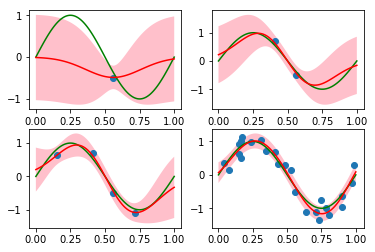

In [8]:

# Plot everything
for i in N:
    plt.subplot(2, 2, N.index(i) + 1)
    plt.plot(x_span, y_groundtruth, 'g')
    plt.plot(x_span, mu_x_o[i - 1], 'r')
    plt.fill_between(x_span, mu_x_o[i - 1] + np.sqrt(S_x_o[i - 1]), mu_x_o[i - 1] - np.sqrt(S_x_o[i - 1]), facecolor='pink')
    plt.scatter(x_n[0:i], t_n[0:i])

